In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Laboratoria/Profundización ETL/superstore.csv")

In [38]:
df.head(5)

,category,city,country,customer_ID,customer_name,discount,market,unknown,order_date,order_id,...,sales,segment,ship_date,ship_mode,shipping_cost,state,sub_category,year,market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 0:00:00,CA-2011-130813,...,19,Consumer,2011-01-09 0:00:00,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 0:00:00,CA-2011-148614,...,19,Consumer,2011-01-26 0:00:00,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 0:00:00,CA-2011-118962,...,21,Consumer,2011-08-09 0:00:00,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 0:00:00,CA-2011-118962,...,111,Consumer,2011-08-09 0:00:00,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 0:00:00,CA-2011-146969,...,6,Consumer,2011-10-03 0:00:00,Standard Class,1.32,California,Paper,2011,North America,40


In [5]:
#identificar valores nulos
completitud_por_columna = 100 * (1 - df.isnull().mean())
completitud_por_columna

,0
category,100.0
city,100.0
country,100.0
customer_ID,100.0
customer_name,100.0
discount,100.0
market,100.0
unknown,100.0
order_date,100.0
order_id,100.0


In [6]:
#identificar y manejar valores duplicados
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        51290 non-null  object 
 1   city            51290 non-null  object 
 2   country         51290 non-null  object 
 3   customer_ID     51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   discount        51290 non-null  float64
 6   market          51290 non-null  object 
 7   unknown         51290 non-null  int64  
 8   order_date      51290 non-null  object 
 9   order_id        51290 non-null  object 
 10  order_priority  51290 non-null  object 
 11  product_id      51290 non-null  object 
 12  product_name    51290 non-null  object 
 13  profit          51290 non-null  float64
 14  quantity        51290 non-null  int64  
 15  region          51290 non-null  object 
 16  row_id          51290 non-null  int64  
 17  sales           51290 non-null 

In [37]:
#identificar datos discrepantes en variables categoricas
df['category'].unique()#['Office Supplies' 'Technology' 'Furniture']
df['city'].unique()#['Los Angeles' 'San Francisco' 'San Diego' ... 'Ontario' 'Whittier','Redwood City']
df['country'].unique()
df['customer_name'].unique()
df['market'].unique()#['US' 'EU' 'LATAM' 'Africa' 'APAC' 'EMEA' 'Canada']
df['unknown'].unique()#[1]
df['order_date'].unique() #debe ser fecha
df['order_priority'].unique()#['High' 'Medium' 'Critical' 'Low']
df['product_name'].unique()
df['region'].unique()#['West' 'East' 'South' 'Central' 'Africa' 'Central Asia' 'North Asia','Caribbean' 'North' 'EMEA' 'Oceania' 'Southeast Asia' 'Canada']
df['segment'].unique()#array(['Consumer', 'Home Office', 'Corporate'], dtype=object)
df['ship_date'].unique() #debe ser fecha
df['ship_mode'].unique()#array(['Second Class', 'Standard Class', 'Same Day', 'First Class'],dtype=object)
df['state'].unique()#array(['California', 'New York', 'Washington', ..., 'Tennessee', 'Oregon','Wyoming'], dtype=object)
df['sub_category'].unique()#array(['Paper', 'Art', 'Storage', 'Appliances', 'Supplies', 'Envelopes','Fasteners', 'Labels', 'Binders', 'Accessories', 'Phones','Copiers', 'Machines', 'Tables', 'Bookcases', 'Chairs','Furnishings'], dtype=object)
df['market2'].unique()#['North America', 'EU', 'LATAM', 'Africa', 'APAC', 'EMEA'],


array(['North America', 'EU', 'LATAM', 'Africa', 'APAC', 'EMEA'],
      dtype=object)

In [53]:
#identificar datos discrepantes en variables numéricas mediante el iqr

Q1 = df.select_dtypes(include=['int', 'float']).quantile(0.25)  # Primer cuartil
Q3 = df.select_dtypes(include=['int', 'float']).quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1           # Rango intercuartil

# Definir límites para detectar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar valores fuera de estos límites
outliers = (df.select_dtypes(include=['int', 'float']) < lower_bound) | (df.select_dtypes(include=['int', 'float']) > upper_bound)
df[outliers].dropna(how='all',inplace=True)


None


In [55]:
#Comprobar y cambiar tipo de dato
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y', errors='coerce')
df['ship_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y', errors='coerce')

In [56]:
# web scraping
import requests

In [57]:
url = 'https://en.wikipedia.org/wiki/List_of_supermarket_chains'
#pasar "User-agent" para simular interacción con la página usando Navegador web
headers = {"User-agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

respuesta = requests.get(url, headers=headers)

# El código de respuesta <200> indicará que todo salió bien
print(respuesta)#<Response [200]>

<Response [200]>


In [63]:
all_tables = pd.read_html(respuesta.content, encoding = 'utf8')
all_tables[1]# esta es la tabla necesaria

,Company,Headquarters,Served countries (besides the headquarters),Map,Number of locations,Number of employees
0,7-Eleven,Japan United States,"Australia, Canada, China, Cambodia, Denmark, H...",NaN,85000,170000
1,Aeon,Japan,"Australia, Cambodia, China, Hong Kong, India, ...",NaN,20008,"560,000+"
2,Ahold Delhaize,Netherlands,"Belgium (as Albert Heijn and Delhaize), Czech ...",NaN,7659,375000
3,Aldi Nord,Germany,"Belgium, France, Luxembourg, Netherlands, Pola...",NaN,5435,72811
4,Aldi Süd,Germany,"Australia, Austria (as Hofer), China, Hungary,...",NaN,7397,201361
...,...,...,...,...,...,...
370,T&T Supermarket,Canada,NaN,NaN,33,NaN
371,Match,Belgium,"Luxembourg, France",NaN,217,NaN
372,C-market,Serbia,NaN,NaN,NaN,NaN
373,Tegut,Germany,NaN,NaN,275,7700


In [62]:
#pasar df de superstore a csv
#df.to_csv('superstore_final.csv', index=False, encoding='utf-8')

#pasar df de multinacional a csv
#all_tables[1].to_csv('multinacional_final.csv', index=False, encoding='utf-8')

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

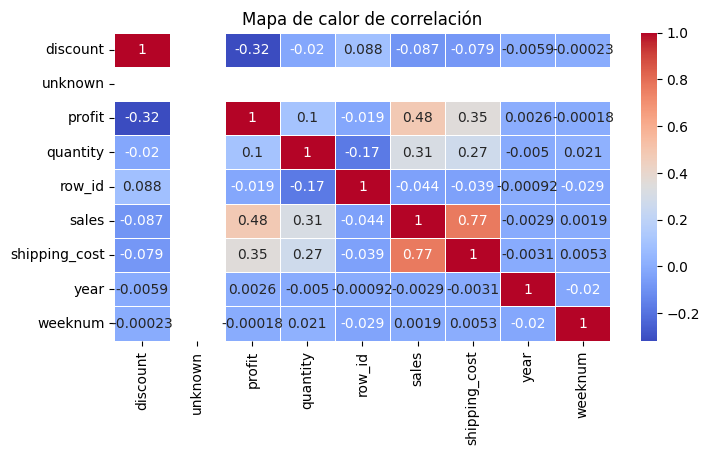

In [69]:
#selecciona features

# Calcular la matriz de correlación
correlacion = df.select_dtypes(include=['int', 'float']).corr()

# Crear el heatmap
plt.figure(figsize=(8,4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de calor de correlación")
plt.show()

In [71]:
df.select_dtypes(include=['object'])

,category,city,country,customer_ID,customer_name,market,order_id,order_priority,product_id,product_name,region,segment,ship_mode,state,sub_category,market2
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,US,CA-2011-130813,High,OFF-PA-10002005,Xerox 225,West,Consumer,Second Class,California,Paper,North America
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,US,CA-2011-148614,Medium,OFF-PA-10002893,"Wirebound Service Call Books, 5 1/2"" x 4""",West,Consumer,Standard Class,California,Paper,North America
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,US,CA-2011-118962,Medium,OFF-PA-10000659,"Adams Phone Message Book, Professional, 400 Me...",West,Consumer,Standard Class,California,Paper,North America
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,US,CA-2011-118962,Medium,OFF-PA-10001144,Xerox 1913,West,Consumer,Standard Class,California,Paper,North America
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,US,CA-2011-146969,High,OFF-PA-10002105,Xerox 223,West,Consumer,Standard Class,California,Paper,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,US,CA-2014-109701,High,OFF-BI-10000632,Satellite Sectional Post Binders,West,Corporate,Same Day,California,Binders,North America
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,US,CA-2014-109701,High,OFF-BI-10004187,Staples,West,Corporate,Same Day,California,Binders,North America
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,US,CA-2014-106964,Medium,OFF-BI-10000320,GBC Plastic Binding Combs,West,Home Office,First Class,California,Binders,North America
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,US,CA-2014-145219,Critical,OFF-BI-10001670,Vinyl Sectional Post Binders,West,Home Office,First Class,California,Binders,North America


In [78]:
df_multinacional = pd.read_csv('multinacional_final.csv')
df_multinacional.info()
df_multinacional.select_dtypes(include=['object'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Company                                      375 non-null    object 
 1   Headquarters                                 374 non-null    object 
 2   Served countries (besides the headquarters)  118 non-null    object 
 3   Map                                          0 non-null      float64
 4   Number of locations                          295 non-null    object 
 5   Number of employees                          192 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.7+ KB


In [79]:
features_superstore = ['profit','quantity','sales','shipping_cost','category','city','region','state','country','market']
features_multinacional = ['Company','Number of locations','Number of employees']

In [82]:
df_superstore = df[['profit','quantity','sales','shipping_cost','category','city','region','state','country','market']]

In [83]:
df_multinacional = df_multinacional[['Company','Number of locations','Number of employees']]

In [87]:
# Unir tablas
df = pd.concat([df_superstore, df_multinacional])

In [88]:
df.to_csv('superstore.csv', index=False, encoding='utf-8')